In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('creditcard.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 284807 entries, 0.0 to 172792.0
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22 

In [4]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
(df['Class'].value_counts()/df['Class'].count())*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

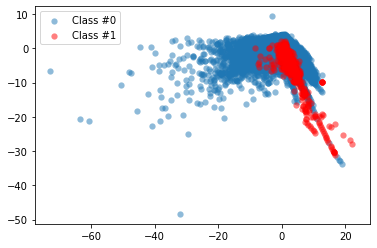

In [11]:
def prep_data(df):
    x = df.iloc[:, 1:28]
    x = np.array(x).astype(float)
    y = df.iloc[:, 29]
    y = np.array(y).astype(float)
    return x,y

def plot_data(x,y):
    plt.scatter(x[y==0, 0], x[y==0, 1], label='Class #0', alpha=0.5, linewidth=0.15)
    plt.scatter(x[y==1, 0], x[y==1, 1], label='Class #1', alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

x, y = prep_data(df)

plot_data(x, y)

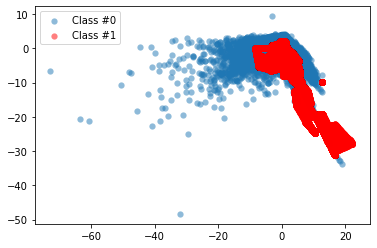

In [13]:
method = SMOTE()
X_resampled, y_resampled = method.fit_resample(x, y)
plot_data(X_resampled, y_resampled)

Original set:
0.0    284315
1.0       492
dtype: int64

SMOTE:
0.0    284315
1.0    284315
dtype: int64



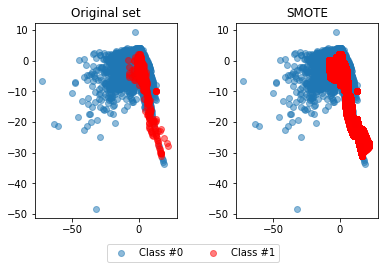

In [15]:
def compare_plot(x, y, X_resampled, y_resampled, method):
    f, (ax1, ax2) = plt.subplots(1, 2)
    c0 = ax1.scatter(x[y==0, 0], x[y==0, 1], label='Class #0',alpha=0.5)
    c1 = ax1.scatter(x[y==1, 0], x[y==1, 1], label='Class #1',alpha=0.5, c='r')
    ax1.set_title('Original set')
    ax2.scatter(X_resampled[y_resampled==0, 0], X_resampled[y_resampled==0, 1], label='Class #0', alpha=.5)
    ax2.scatter(X_resampled[y_resampled==1, 0], X_resampled[y_resampled==1, 1], label='Class #1', alpha=.5,c='r')
    ax2.set_title(method)
    plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center', ncol=2, labelspacing=0.)
    plt.tight_layout(pad=3)
    return plt.show()

print(f'Original set:\n'
      f'{pd.value_counts(pd.Series(y))}\n\n'
      f'SMOTE:\n'
      f'{pd.value_counts(pd.Series(y_resampled))}\n')

compare_plot(x, y, X_resampled, y_resampled, method='SMOTE')

In [17]:
print(df.groupby('Class').mean().round(3)[['V1', 'V3']])

          V1     V3
Class              
0      0.008  0.012
1     -4.772 -7.033


In [18]:
df['flag_as_fraud'] = np.where(np.logical_and(df['V1']<-3, df['V3']<-5), 1, 0)
print(pd.crosstab(df['Class'], df['flag_as_fraud'], rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud       0     1
Actual Fraud               
0              283089  1226
1                 322   170


In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print(pd.crosstab(y_test, predictions, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud    0.0  1.0
Actual Fraud             
0.0            85285   11
1.0               55   92


In [22]:
# Defining which resampling method and which ML model to use in the pipeline
resampling = SMOTE()
lr = LogisticRegression()

pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', lr)])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(pd.crosstab(y_test, predictions, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud    0.0   1.0
Actual Fraud              
0.0            83109  2187
1.0               12   135
